In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
!pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn_extra.cluster import KMedoids

In [4]:
import sqlite3
import pandas as pd

dbfile = 'accident_data_v1.0.0_2023.db'
con=sqlite3.connect(dbfile)

cur = con.cursor()
table_list = [a[0] for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
print(f'Table names are : {table_list}')
df_accident = pd.read_sql_query('SELECT longitude, latitude From accident', con)

Table names are : ['accident', 'casualty', 'vehicle', 'lsoa']


In [5]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461352 entries, 0 to 461351
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  461226 non-null  float64
 1   latitude   461226 non-null  float64
dtypes: float64(2)
memory usage: 7.0 MB


In [6]:
df_accident = df_accident.dropna() 

In [38]:
from numpy.random import default_rng
df = np.array(df_accident)
rng = default_rng()
idx= rng.choice(df.shape[0], size=20000, replace= False)
X = df[idx]

In [39]:
print (X[0:10])

[[-3.217076 51.43851 ]
 [-3.706712 51.487365]
 [-3.081619 51.006758]
 [-1.328203 54.584974]
 [-2.22728  53.806322]
 [-0.168876 51.455802]
 [-0.198184 51.393594]
 [-2.955416 53.390506]
 [-1.497127 53.359764]
 [-0.128353 51.434775]]


In [40]:
kmedoids = KMedoids(n_clusters=25, random_state=42)
kmedoids.fit(X)

KMedoids(n_clusters=25, random_state=42)

In [33]:
import seaborn as sns

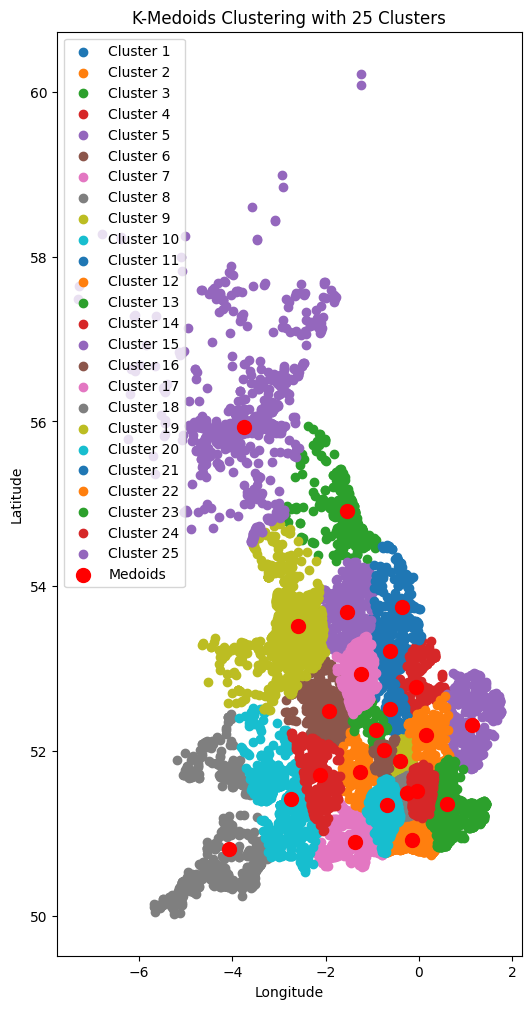

In [42]:


cluster_labels = kmedoids.labels_
medoids_indices = kmedoids.medoid_indices_

# Visualize the clusters
plt.figure(figsize=(6, 12))
for i in range(25):
    cluster_points = X[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i + 1}")

# Highlight medoids
plt.scatter(X[medoids_indices, 0], X[medoids_indices, 1], marker="o", color="red", s=100, label="Medoids")

plt.title("K-Medoids Clustering with 25 Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()